In [3]:
# Red Wine Quality Prediction
# Problem Statement:
# The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

# This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# Attribute Information

# Input variables (based on physicochemical tests):
#1 - fixed acidity
#2 - volatile acidity
#3 - citric acid
#4 - residual sugar
#5 - chlorides
#6 - free sulfur dioxide
#7 - total sulfur dioxide
#8 - density
#9 - pH
#10 - sulphates
#11 - alcohol
# Output variable (based on sensory data):
# 12 - quality (score between 0 and 10)

# What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
# This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

# You need to build a classification model. 

# Inspiration

# Use machine learning to determine which physiochemical properties make a wine 'good'!



In [5]:
# We shall be applying some classification machine learning models to figure out what makes a good quality wine!

# We shall build various classification models to predict whether a particular red wine is “good quality” or not.
# Each wine in this dataset is given a “quality” score between 0 and 10.
# For the purpose of this project, I converted the output to a binary output where each wine is either “good quality” (a score of 7 or higher) or not (a score below 7).
# The quality of a wine is determined by 11 input variables:
#1 - fixed acidity
#2 - volatile acidity
#3 - citric acid
#4 - residual sugar
#5 - chlorides
#6 - free sulfur dioxide
#7 - total sulfur dioxide
#8 - density
#9 - pH
#10 - sulphates
#11 - alcohol

# Output variable (based on sensory data):
# 12 - quality (score between 0 and 10)


# Objectives
# The objectives of this project are as follows

#To experiment with different classification methods to see which yields the highest accuracy
#To determine which features are the most indicative of a good quality wine

In [ ]:
# IMPORTING LIBRARIES
# First of all import all the required libraries like pandas, numpy, seaborn,matplotlib etc. And load the data (winequality-red.csv file) from GITHUB link (https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv) to train the model and test the model and show the top five rows of database.

In [37]:
import pandas as pd
# for data manipulation

import numpy as np          
# for mathematical calculations

import seaborn as sns   
# for data visualization

import matplotlib.pyplot as plt 
# for plotting graphs
plt.style.use('seaborn')
# the seaborn stylesheet will make our plots look neat and pretty.

%matplotlib inline                   
# "%matplotlib inline" ensures commands in cells below the cell that outputs a plot does not affect the plot
    
import warnings 
# to ignore any warnings
warnings.filterwarnings("ignore")

In [9]:
# READING DATA

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [11]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
# Here size of dataset is 1599 rows and 12 columns and the target variable is quality.

In [13]:
df.shape

(1599, 12)

In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
# identifying columns name

In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
# See the first five rows of the dataset
# There are a total of 1599 rows and 12 columns.
# The data looks very clean by looking at the first five rows, but I still wanted to make sure that there were no missing values.

In [21]:
# Performing EDA # Checking Null Values in Dataframe

In [22]:
df.isnull().sum() #checking to see if any feature has empty/missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
# since there are no null values present in dataset, we can proceed

In [24]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [25]:
# Checking the datatypes of columns

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
# The info() function is used to print a concise summary of a DataFrame
# We see that after cleaning we have 1599 rows of clean data with no null values. There are 12 columns and two datatypes(int, float) in dataframe.

In [29]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [30]:
 #This is used to view basic statistical details like percentile, mean, std etc

In [31]:
# Exploring Variables
# Histogram of ‘quality’ variable
# First, we will see the distribution of the quality variable and make sure that we have enough ‘good quality’ wines in our dataset. We will defined ‘good quality’ later.

In [32]:
# Data Analysis and Visualization
# Univariate plots are used to understand each feature.
# Histograms were used to view the frequency distribution of the variables.
# first of all we will see the distribution of the quality variableas we wanted to make sure that we had enough ‘good quality’ wines in our dataset — we will see later how we defined ‘good quality’.

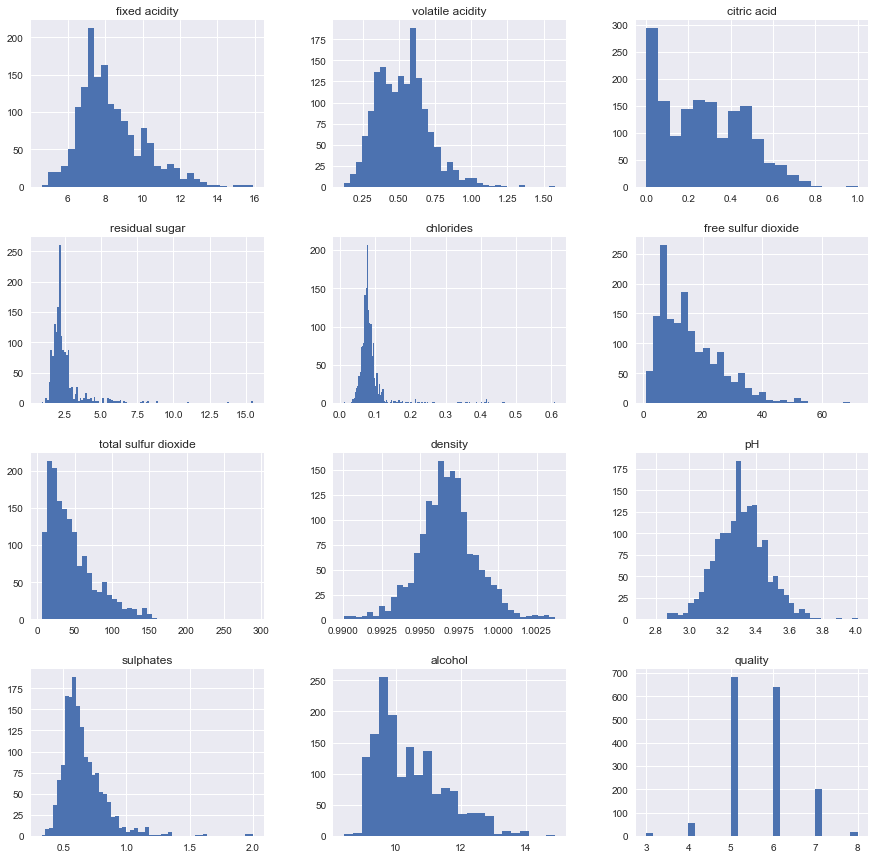

In [35]:
df.hist(bins='auto', figsize=(15,15));

In [38]:
# We can check for outliers using boxplots

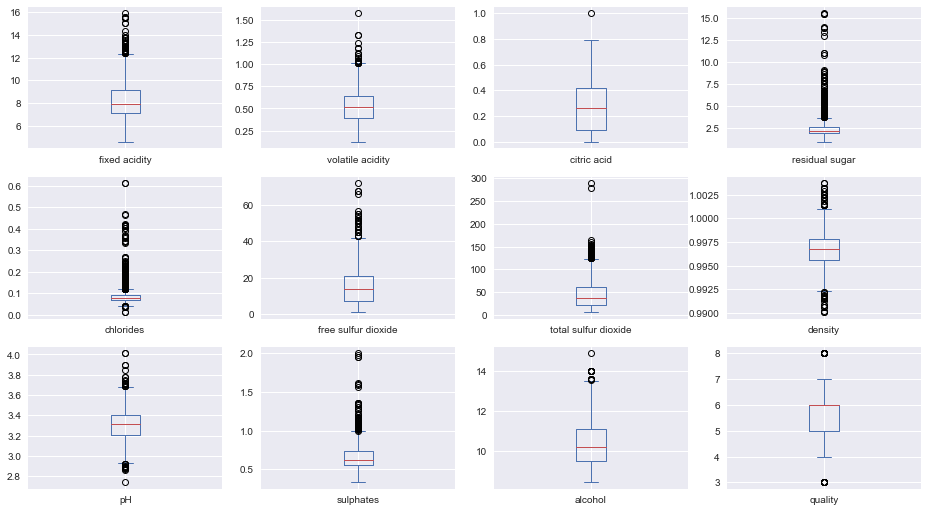

In [51]:
df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']].plot(kind='box', subplots=True, layout=(4,4), figsize=(16,12), grid=True);

In [52]:
# Outliers were checked by using boxplots.
# The output shows there are outliers present in all the features.

In [53]:
# Bivariate Plots
# This is used to understand the relationship between variables

In [54]:
# let's see the correlation between the features using heatmap
# Checking the correlation of features helps us decide which features affect the target variable the most, and in turn, get used in predicting the target variable.

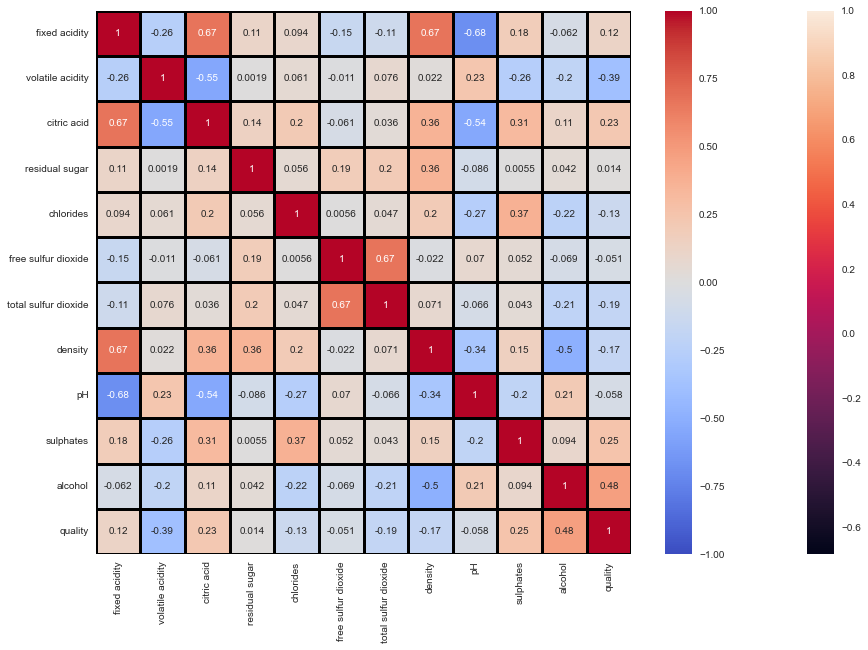

In [56]:
plt.figure(figsize=(15, 10))
# This specifies the size, the bigger the map, the easier we can understand the map
sns.heatmap(df.corr())
# This is sufficient but adding the 'annot' argument makes interpretaton easier
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
# 'annot' helps display the correlation coefficient
plt.show()

In [57]:
# The darker the box, the stronger/higher the correlation.

# Quality Score correlates strongly with alcohal.
# It has low correlates of quality with sulphates,residual sugar, citric acids and fixed acidity.
# It has inverse relationship of quality with ph,density,total sulfur dioxide, free sulfur dioxide,chloides and volatile acidity.

In [58]:
# Convert to a Classification Problem
# Now we will compare the effectiveness of different classification techniques, for that we needed to change the output variable to a binary output.
#For this problem, we defined a bottle of wine as ‘good quality’ if it had a quality score of 7 or higher, and if it had a score of less than 7, it was deemed ‘bad quality’.
# Once we convert the output variable to a binary output, we separated our feature variables (X) and the target variable (y) into separate dataframes.

In [62]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [61]:
# Proportion of Good vs Bad Wines
# we will make sure that there is a reasonable number of good quality wines.

In [63]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [64]:
# Preparing Data for Modelling
# Standardizing Feature Variables
# At this point, we are ready to prepare the data for modelling. The first thing that we will do is, standardize the data.
# Standardizing the data means that it will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.
# It’s important to standardize your data in order to equalize the range of the data.

In [65]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [66]:
# Splitting of data
# Next we will split the data into a training and test set so that we can cross-validate our models and determine its effectiveness.

In [67]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [68]:
# Modelling
# For this project, I wanted to compare five different machine learning models: decision trees, random forests, AdaBoost and Gradient Boost. For the purpose of this project, I wanted to compare these models by their accuracy.

In [69]:
# Model 1: Decision Tree.
# Decision trees are a popular model, used in operations research, strategic planning, and machine learning. Each square above is called a node, and the more nodes you have, the more accurate your decision tree will be (generally). The last nodes of the decision tree, where a decision is made, are called the leaves of the tree. Decision trees are intuitive and easy to build but fall short when it comes to accuracy.

In [70]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.53      0.73      0.62        45

    accuracy                           0.90       400
   macro avg       0.75      0.83      0.78       400
weighted avg       0.92      0.90      0.90       400



In [71]:
#Model 2: Random Forest
#Random forests are an ensemble learning technique that builds off of decision trees. Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each step of the decision tree. The model then selects the mode of all of the predictions of each decision tree. What’s the point of this? By relying on a “majority wins” model, it reduces the risk of error from an individual tree.

In [72]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



In [73]:
# Model 3: AdaBoost

In [74]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.51      0.49      0.50        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.89      0.89      0.89       400



In [75]:
#Model 4: Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.52      0.51      0.52        45

    accuracy                           0.89       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.89      0.89      0.89       400



In [ ]:
# By comparing the four models, the random forest model seems to yield the highest level of accuracy.

In [81]:
# Feature Importance
# Below, we have graphed the feature importance based on the Random Forest model . If you look below the graphs, I split the dataset into good quality and bad quality to compare these variables in more detail.

In [82]:
# via Random Forest

<AxesSubplot:>

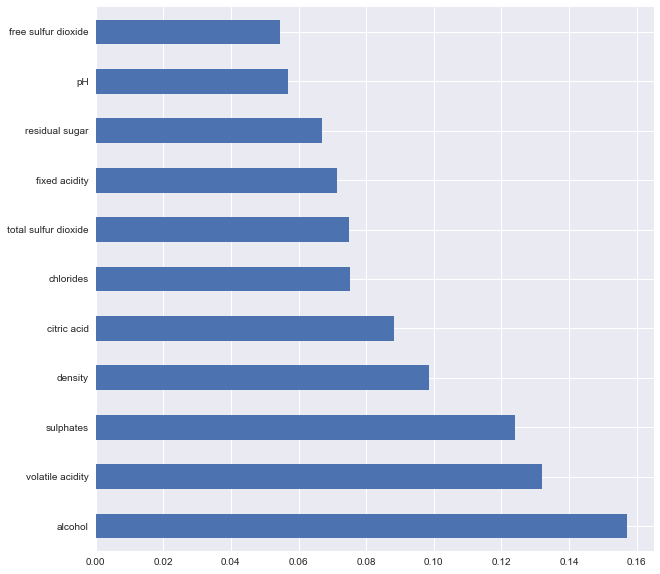

In [83]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [84]:
# Comparing the Top 4 Features

In [86]:
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
df_temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.0


In [87]:
# dataframe for only good quality wines

In [88]:
# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.601719,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,5.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000,0.0


In [89]:
# dataframe for only bad quality wines

In [ ]:
# By looking into the details, we can see that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.